In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector,Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user10\Anaconda3\envs\P

In [3]:
df = pd.read_csv('./data/data_2.csv')
df

,Pid,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,...,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,m_b,pred1
0,3227,126.5,216,60,126.5,127.0,110,78,126.0,127.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3227,127.0,2,60,126.5,127.0,108,78,126.0,127.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
2,3227,127.0,6,62,126.5,127.0,102,79,126.0,127.5,...,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0,NaN,0.0
3,3227,127.0,7,63,126.5,127.0,102,78,126.0,127.5,...,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,NaN,0.0
4,3227,127.0,7,93,126.5,127.0,103,78,126.0,127.5,...,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253055,3227,130.5,1,212,130.0,130.5,22,142,129.5,131.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,130.25,0.0
253056,3227,0.0,0,213,130.0,130.5,22,142,129.5,131.0,...,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,130.25,0.0
253057,3227,0.0,0,213,130.0,130.5,15,142,129.5,131.0,...,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0,130.25,0.0
253058,3227,130.5,1,213,130.0,130.5,14,142,129.5,131.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,130.25,0.0


In [4]:
df = df.drop(['Pid', 'm_b', 'pred1'], axis=1)
df

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq1_dt,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt
0,126.5,216,60,126.5,127.0,110,78,126.0,127.5,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,127.0,2,60,126.5,127.0,108,78,126.0,127.5,36,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,127.0,6,62,126.5,127.0,102,79,126.0,127.5,41,...,-6.0,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0
3,127.0,7,63,126.5,127.0,102,78,126.0,127.5,40,...,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
4,127.0,7,93,126.5,127.0,103,78,126.0,127.5,41,...,1.0,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253055,130.5,1,212,130.0,130.5,22,142,129.5,131.0,24,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253056,0.0,0,213,130.0,130.5,22,142,129.5,131.0,24,...,0.0,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
253057,0.0,0,213,130.0,130.5,15,142,129.5,131.0,25,...,-7.0,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0
253058,130.5,1,213,130.0,130.5,14,142,129.5,131.0,26,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0


In [5]:
df = df.drop([0])
df = df.reset_index(drop = True)
df

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq1_dt,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt
0,127.0,2,60,126.5,127.0,108,78,126.0,127.5,36,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,6,62,126.5,127.0,102,79,126.0,127.5,41,...,-6.0,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0
2,127.0,7,63,126.5,127.0,102,78,126.0,127.5,40,...,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,127.0,7,93,126.5,127.0,103,78,126.0,127.5,41,...,1.0,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0
4,127.0,102,92,126.5,127.0,8,78,126.0,127.5,41,...,-95.0,0.0,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,130.5,1,212,130.0,130.5,22,142,129.5,131.0,24,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253055,0.0,0,213,130.0,130.5,22,142,129.5,131.0,24,...,0.0,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
253056,0.0,0,213,130.0,130.5,15,142,129.5,131.0,25,...,-7.0,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0
253057,130.5,1,213,130.0,130.5,14,142,129.5,131.0,26,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0


In [6]:
#因為b21_diff_abs這個col剛好都為同一個值 -> drop 
df = df.drop(['b21_diff_abs'], axis = 1)
df

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq1_dt,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt
0,127.0,2,60,126.5,127.0,108,78,126.0,127.5,36,...,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,127.0,6,62,126.5,127.0,102,79,126.0,127.5,41,...,-6.0,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0
2,127.0,7,63,126.5,127.0,102,78,126.0,127.5,40,...,0.0,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,127.0,7,93,126.5,127.0,103,78,126.0,127.5,41,...,1.0,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0
4,127.0,102,92,126.5,127.0,8,78,126.0,127.5,41,...,-95.0,0.0,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,130.5,1,212,130.0,130.5,22,142,129.5,131.0,24,...,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
253055,0.0,0,213,130.0,130.5,22,142,129.5,131.0,24,...,0.0,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0
253056,0.0,0,213,130.0,130.5,15,142,129.5,131.0,25,...,-7.0,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0
253057,130.5,1,213,130.0,130.5,14,142,129.5,131.0,26,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0


In [7]:
#response change to log return
df['Price'] = df['DealPrice']
idx = [i for i, e in enumerate(df['Price']) if e == 0]
for i in idx:
    df['Price'].iloc[i] = df['Price'].iloc[i - 1]
df

C:\Users\user10\Anaconda3\envs\PythonGPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,Price
0,127.0,2,60,126.5,127.0,108,78,126.0,127.5,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0
1,127.0,6,62,126.5,127.0,102,79,126.0,127.5,41,...,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0,127.0
2,127.0,7,63,126.5,127.0,102,78,126.0,127.5,40,...,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,127.0
3,127.0,7,93,126.5,127.0,103,78,126.0,127.5,41,...,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0,127.0
4,127.0,102,92,126.5,127.0,8,78,126.0,127.5,41,...,0.0,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0,127.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,130.5,1,212,130.0,130.5,22,142,129.5,131.0,24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,130.5
253055,0.0,0,213,130.0,130.5,22,142,129.5,131.0,24,...,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,130.5
253056,0.0,0,213,130.0,130.5,15,142,129.5,131.0,25,...,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0,130.5
253057,130.5,1,213,130.0,130.5,14,142,129.5,131.0,26,...,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,130.5


In [8]:
np.sum(df['Price'] == 0)

0

In [9]:
df['return'] = np.log(df['Price'] / df['Price'].shift(1))
df

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,Price,return
0,127.0,2,60,126.5,127.0,108,78,126.0,127.5,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,127.0,NaN
1,127.0,6,62,126.5,127.0,102,79,126.0,127.5,41,...,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0,127.0,0.000000
2,127.0,7,63,126.5,127.0,102,78,126.0,127.5,40,...,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,127.0,0.000000
3,127.0,7,93,126.5,127.0,103,78,126.0,127.5,41,...,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0,127.0,0.000000
4,127.0,102,92,126.5,127.0,8,78,126.0,127.5,41,...,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0,127.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253054,130.5,1,212,130.0,130.5,22,142,129.5,131.0,24,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,130.5,0.003839
253055,0.0,0,213,130.0,130.5,22,142,129.5,131.0,24,...,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,130.5,0.000000
253056,0.0,0,213,130.0,130.5,15,142,129.5,131.0,25,...,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0,130.5,0.000000
253057,130.5,1,213,130.0,130.5,14,142,129.5,131.0,26,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,130.5,0.000000


In [10]:
df = df.drop([0])
df = df.reset_index(drop = True)
df = df.drop(['Price'], axis = 1)
df

,DealPrice,DealQty,BidQty1,Bid1,Ask1,AskQty1,BidQty2,Bid2,Ask2,AskQty2,...,daq2_dt,daq3_dt,daq4_dt,daq5_dt,dbq1_dt,dbq2_dt,dbq3_dt,dbq4_dt,dbq5_dt,return
0,127.0,6,62,126.5,127.0,102,79,126.0,127.5,41,...,5.0,0.0,0.0,5.0,2.0,1.0,0.0,0.0,5.0,0.000000
1,127.0,7,63,126.5,127.0,102,78,126.0,127.5,40,...,-1.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.000000
2,127.0,7,93,126.5,127.0,103,78,126.0,127.5,41,...,1.0,0.0,-1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.000000
3,127.0,102,92,126.5,127.0,8,78,126.0,127.5,41,...,0.0,0.0,0.0,-1.0,-1.0,0.0,6.0,1.0,0.0,0.000000
4,127.0,11,142,127.0,127.5,40,93,126.5,128.0,150,...,109.0,-120.0,44.0,-63.0,50.0,15.0,19.0,-24.0,67.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253053,130.5,1,212,130.0,130.5,22,142,129.5,131.0,24,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003839
253054,0.0,0,213,130.0,130.5,22,142,129.5,131.0,24,...,0.0,-4.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.000000
253055,0.0,0,213,130.0,130.5,15,142,129.5,131.0,25,...,1.0,0.0,-4.0,0.0,0.0,0.0,-4.0,-10.0,1.0,0.000000
253056,130.5,1,213,130.0,130.5,14,142,129.5,131.0,26,...,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0,0.000000


In [11]:
np.sum(np.sum(df.isnull()))

0

In [18]:
#normalize
def normalize(df):
    norm = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
    return norm
#scale back to the true range
def true_range(df, x):
    X = (x * (df['return'].max() - df['return'].min())) + df['return'].min()
    return X
#rolling windows
def train_windows(df, ref_day=5, predict_day=1):
    X_train, Y_train = [], []
    for i in range(df.shape[0]-predict_day-ref_day):
        X_train.append(np.array(df.iloc[i:i+ref_day,:-1]))
        Y_train.append(np.array(df.iloc[i+ref_day:i+ref_day+predict_day]["return"]))
    return np.array(X_train), np.array(Y_train)
#LSTM (when add the drop out layer in order to deal with overfitting)
def lstm_stock_model(shape):
    model = Sequential()
    model.add(LSTM(256, input_shape=(shape[1], shape[2]), return_sequences=True))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(1)))
    model.add(Flatten())
    model.add(Dense(5,activation='linear'))
    model.add(Dense(1,activation='linear'))
    model.compile(loss="mean_absolute_error", optimizer="adam",metrics=['mean_absolute_error'])
    model.summary()
    return model

In [13]:
#normalize
norm_df = normalize(df)
#train test split
test = norm_df[-round(df.shape[0]*0.3):]
test = test.reset_index(drop = True)
train = norm_df[:round(df.shape[0]*0.7)]
#10 days forecast next day
X_train, Y_train = train_windows(train, 10, 1)
X_test, Y_test = train_windows(test, 10, 1)

In [14]:
#adjusting parameters
batch_size = [128, 256, 512]

In [15]:
#adding drop out layer(pct = 0.5)
#batch size = 256
#early stop -> val loss patience = 10
model_1 = lstm_stock_model(X_train.shape)
callback = EarlyStopping(monitor="val_mean_absolute_error", patience=10, verbose=1, mode="min")
history_1 = model_1.fit(X_train, Y_train, epochs=500, batch_size=batch_size[1], validation_split=0.1, callbacks=[callback], shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 256)           331776    
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 1)             257       
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

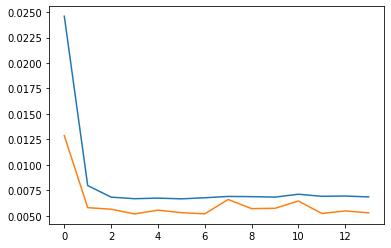

In [16]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])

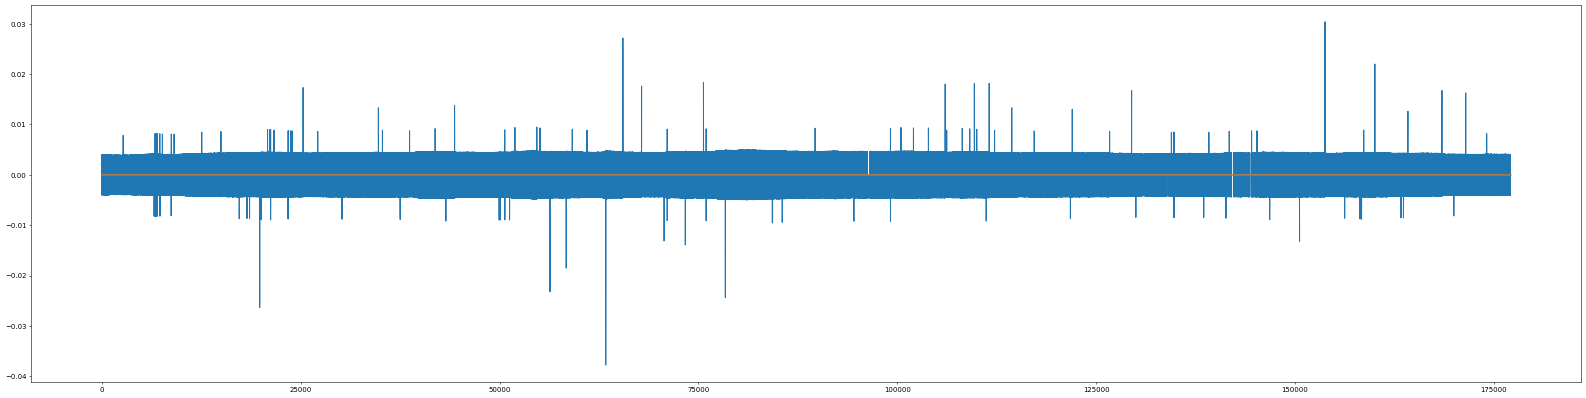

In [19]:
X_t = model_1.predict(X_train)
plt.figure(figsize=(40,10),dpi=50)
plt.plot(true_range(df, Y_train))
plt.plot(true_range(df, X_t))

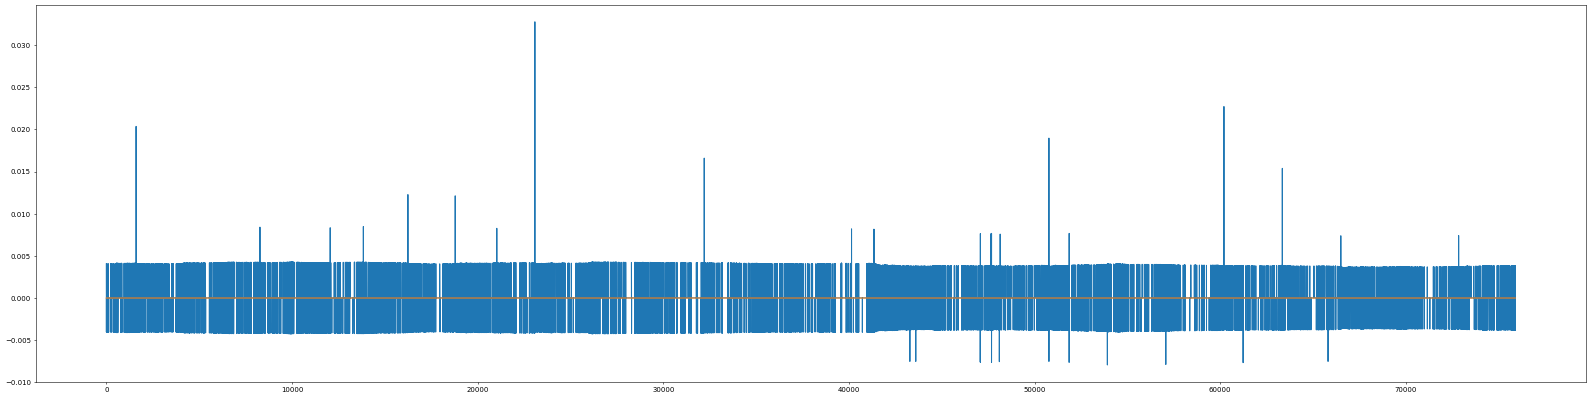

In [20]:
Xt = model_1.predict(X_test)
plt.figure(figsize=(40,10),dpi=50)
plt.plot(true_range(df, Y_test))
plt.plot(true_range(df, Xt))

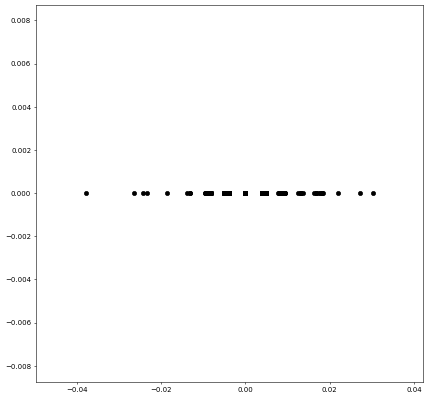

In [21]:
plt.figure(figsize=(10,10),dpi=50)
plt.scatter(true_range(df, Y_train), true_range(df, X_t), color = ['black'])

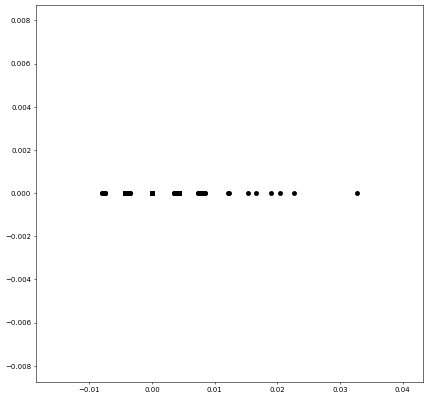

In [22]:
plt.figure(figsize=(10,10),dpi=50)
plt.scatter(true_range(df, Y_test), true_range(df, Xt), color = ['black'])

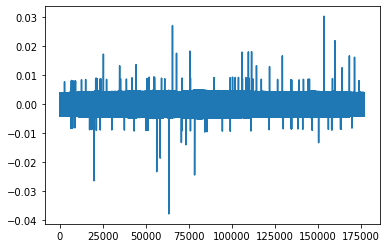

In [23]:
plt.plot(true_range(df, Y_train))

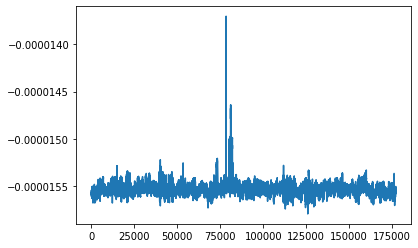

In [27]:
plt.plot(true_range(df, X_t))

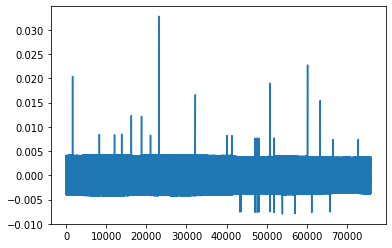

In [25]:
plt.plot(true_range(df, Y_test))

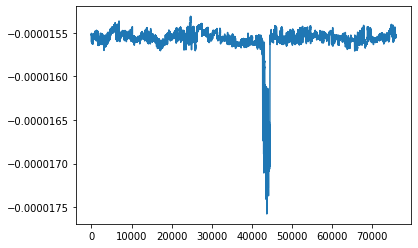

In [26]:
plt.plot(true_range(df, Xt))